In [1]:
import numpy as np
import pandas as pd
import random

from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Start of Model

In [3]:
df_phase2_test = pd.read_csv('test_bow.csv')

In [4]:
df_phase2_test['created_utc2']= df_phase2_test['created_utc'].apply(lambda x: datetime.fromtimestamp(x).date())
df_phase2_test['created_utc2']= pd.to_datetime(df_phase2_test['created_utc2'])
df_phase2_test['created_utc3']= df_phase2_test['created_utc'].apply(lambda x: datetime.fromtimestamp(x))
df_phase2_test

,author,author_fullname,created_utc,full_link,id,is_crosspostable,is_original_content,is_self,is_video,locked,...,pred_nb_class,pred_nb_0_prob,pred_nb_1_prob,pred_nb_2_prob,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,created_utc2,created_utc3
0,TFDP117,t2_ykz2e5o,1583521359,https://www.reddit.com/r/SuicideWatch/comments...,feiax9,False,False,True,False,False,...,1.0,0.236134,0.558678,0.205189,0.0,0.753947,0.241696,0.004357,2020-03-07,2020-03-07 03:02:39
1,TFDP117,t2_ykz2e5o,1577043774,https://www.reddit.com/r/PewdiepieSubmissions/...,ee998s,True,False,False,False,False,...,0.0,0.559459,0.225565,0.214976,0.0,0.999599,0.000254,0.000147,2019-12-23,2019-12-23 03:42:54
2,TFDP117,t2_ykz2e5o,1576829694,https://www.reddit.com/r/cursedimages/comments...,ed7aom,False,False,False,False,False,...,2.0,0.165613,0.213444,0.620943,0.0,0.991338,0.001019,0.007643,2019-12-20,2019-12-20 16:14:54
3,TFDP117,t2_ykz2e5o,1576815946,https://www.reddit.com/r/cursedimages/comments...,ed50b0,True,False,False,False,False,...,2.0,0.165613,0.213444,0.620943,0.0,0.985298,0.003347,0.011355,2019-12-20,2019-12-20 12:25:46
4,TFDP117,t2_ykz2e5o,1576782326,https://www.reddit.com/r/PewdiepieSubmissions/...,ecxq76,True,False,False,False,False,...,0.0,0.413461,0.294293,0.292246,0.0,0.994136,0.005013,0.000850,2019-12-20,2019-12-20 03:05:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,IBringDepression,NaN,1521119740,https://www.reddit.com/r/offmychest/comments/8...,84md3q,True,NaN,True,False,False,...,0.0,0.420662,0.297779,0.281559,0.0,0.952504,0.029630,0.017866,2018-03-15,2018-03-15 21:15:40
9966,IBringDepression,NaN,1520502645,https://www.reddit.com/r/depression/comments/8...,82wd3z,True,NaN,True,False,False,...,0.0,0.421900,0.291445,0.286655,0.0,0.996624,0.001259,0.002117,2018-03-08,2018-03-08 17:50:45
9967,IBringDepression,NaN,1520347348,https://www.reddit.com/r/depression/comments/8...,82fjjh,True,NaN,True,False,False,...,0.0,0.453447,0.335295,0.211257,0.0,0.995243,0.003399,0.001357,2018-03-06,2018-03-06 22:42:28
9968,IBringDepression,NaN,1520338059,https://www.reddit.com/r/depression/comments/8...,82ekjs,True,NaN,True,False,False,...,1.0,0.425835,0.455445,0.118720,0.0,0.887617,0.109753,0.002630,2018-03-06,2018-03-06 20:07:39


In [5]:
#Focused Metrics
df_phase2_test_time=df_phase2_test[['author','created_utc2','created_utc3','pred_lr_class','pred_lr_0_prob','pred_lr_1_prob','pred_lr_2_prob']]

C:\Users\vvack\miniconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


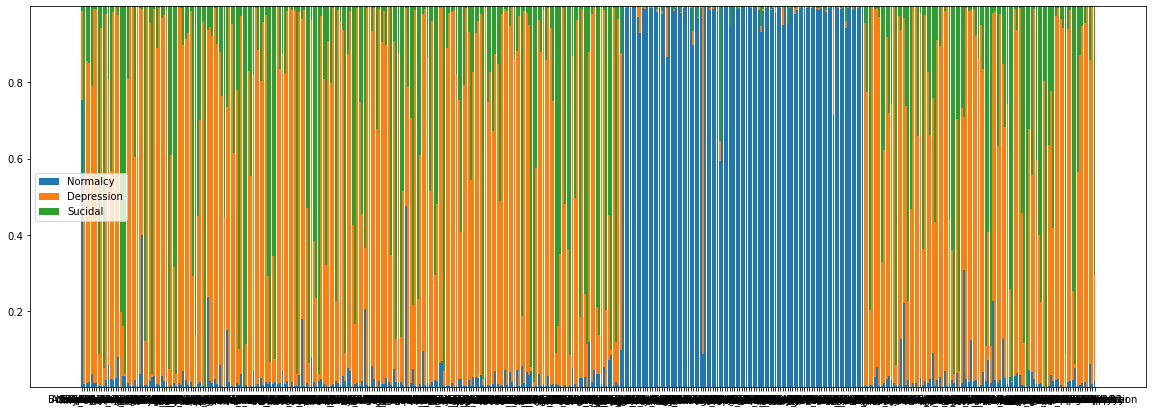

In [6]:
plt.figure(figsize=(20,7))
plt.bar(df_phase2_test_time['author'],df_phase2_test_time['pred_lr_0_prob'], label = 'Normalcy')
plt.bar(df_phase2_test_time['author'],df_phase2_test_time['pred_lr_1_prob'],bottom=df_phase2_test_time['pred_lr_0_prob'], label = 'Depression')
plt.bar(df_phase2_test_time['author'],df_phase2_test_time['pred_lr_2_prob'],bottom=df_phase2_test_time['pred_lr_0_prob']+df_phase2_test_time['pred_lr_1_prob'], label='Sucidal')
plt.legend()
plt.show()

# Flag 1: Users with Suicidal posts

In [7]:
def suicidal(user_data, user_field, suicide_metric, datefield=None, startdatetime=None, enddatetime=None):
    #dataframe, string1, string2, string3,startdate, enddate
    if datefield!=None:
        if startdatetime==None:
            startdatetime=user_data[datefield].min()
        if enddatetime==None:
            enddatetime=user_data[datefield].max()
        truncated=user_data[(user_data[datefield]>=startdatetime) & (user_data[datefield]<=enddatetime)]
        dataframe_reduce=user_data[user_data[user_field].isin(truncated[user_field][truncated[suicide_metric]==2].unique())]
    elif datefield==None:
        dataframe_reduce=user_data[user_data[user_field].isin(user_data[user_field][user_data[suicide_metric]==2].unique())]
    return dataframe_reduce

def author_list(dataframe_reduce,user_field):
    #dataframe, string1
    user_list=dataframe_reduce[user_field].unique().tolist()
    print('List of Users with suicidal posts:')
    print(len(user_list))
    return user_list

In [8]:
#timeframe example
alist_timeframe=author_list(suicidal(df_phase2_test_time,'author','pred_lr_class','created_utc2','2019-03-30','2019-12-31'),'author')

List of Users with suicidal posts:
38


In [9]:
#All users example
alist_all=author_list(suicidal(df_phase2_test_time,'author','pred_lr_class'),'author')

List of Users with suicidal posts:
99


In [10]:
alist_all[5:10] #sample of list

['emvife',
 'throwawaythis199',
 'j_hansen63',
 'manimanito100',
 'Newbeginningtake2']

# Flag 1: User profile example

In [11]:
df_concern=df_phase2_test[df_phase2_test['author']=='Newbeginningtake2'].sort_values(by='created_utc3',ascending=True)
df_concern

,author,author_fullname,created_utc,full_link,id,is_crosspostable,is_original_content,is_self,is_video,locked,...,pred_nb_class,pred_nb_0_prob,pred_nb_1_prob,pred_nb_2_prob,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,created_utc2,created_utc3
791,Newbeginningtake2,t2_vrh11,1457275248,https://www.reddit.com/r/Divorce/comments/497k...,497k8o,NaN,NaN,True,NaN,False,...,1.0,0.288621,0.614819,0.096560,1.0,0.034487,0.959705,0.005808,2016-03-06,2016-03-06 22:40:48
790,Newbeginningtake2,t2_vrh11,1457610462,https://www.reddit.com/r/BPD/comments/49t4b9/a...,49t4b9,NaN,NaN,False,NaN,False,...,1.0,0.325455,0.393039,0.281506,0.0,0.733817,0.170176,0.096006,2016-03-10,2016-03-10 19:47:42
789,Newbeginningtake2,t2_vrh11,1458052438,https://www.reddit.com/r/Anxiety/comments/4aio...,4aiocl,NaN,NaN,True,NaN,False,...,2.0,0.311049,0.173361,0.515591,0.0,0.940452,0.006191,0.053356,2016-03-15,2016-03-15 22:33:58
788,Newbeginningtake2,t2_vrh11,1463577988,https://www.reddit.com/r/Cigarettes/comments/4...,4jwn72,NaN,NaN,True,NaN,False,...,0.0,0.638368,0.191480,0.170152,0.0,0.998580,0.000992,0.000428,2016-05-18,2016-05-18 21:26:28
787,Newbeginningtake2,t2_vrh11,1481582927,https://www.reddit.com/r/SuicideWatch/comments...,5hzux4,NaN,NaN,True,NaN,False,...,1.0,0.303773,0.467341,0.228886,2.0,0.046755,0.257463,0.695782,2016-12-13,2016-12-13 06:48:47
786,Newbeginningtake2,t2_vrh11,1484191876,https://www.reddit.com/r/SelfHarmScars/comment...,5nh03h,NaN,NaN,False,NaN,False,...,0.0,0.485943,0.287910,0.226148,0.0,0.993394,0.005908,0.000698,2017-01-12,2017-01-12 11:31:16
785,Newbeginningtake2,t2_vrh11,1485263628,https://www.reddit.com/r/RandomKindness/commen...,5pw12y,NaN,NaN,True,NaN,False,...,0.0,0.333333,0.333333,0.333333,0.0,0.994861,0.002949,0.002190,2017-01-24,2017-01-24 21:13:48
784,Newbeginningtake2,t2_vrh11,1485264226,https://www.reddit.com/r/RandomKindness/commen...,5pw2qi,NaN,NaN,True,NaN,False,...,0.0,0.404451,0.197691,0.397858,0.0,0.959730,0.001324,0.038946,2017-01-24,2017-01-24 21:23:46
783,Newbeginningtake2,t2_vrh11,1487643101,https://www.reddit.com/r/SuicideWatch/comments...,5v8wxj,NaN,NaN,True,NaN,False,...,2.0,0.278800,0.160570,0.560630,0.0,0.804800,0.012310,0.182891,2017-02-21,2017-02-21 10:11:41
782,Newbeginningtake2,t2_vrh11,1488412045,https://www.reddit.com/r/selfharmpics/comments...,5wzpi3,NaN,NaN,False,NaN,False,...,1.0,0.194531,0.529092,0.276378,0.0,0.473895,0.262109,0.263996,2017-03-02,2017-03-02 07:47:25


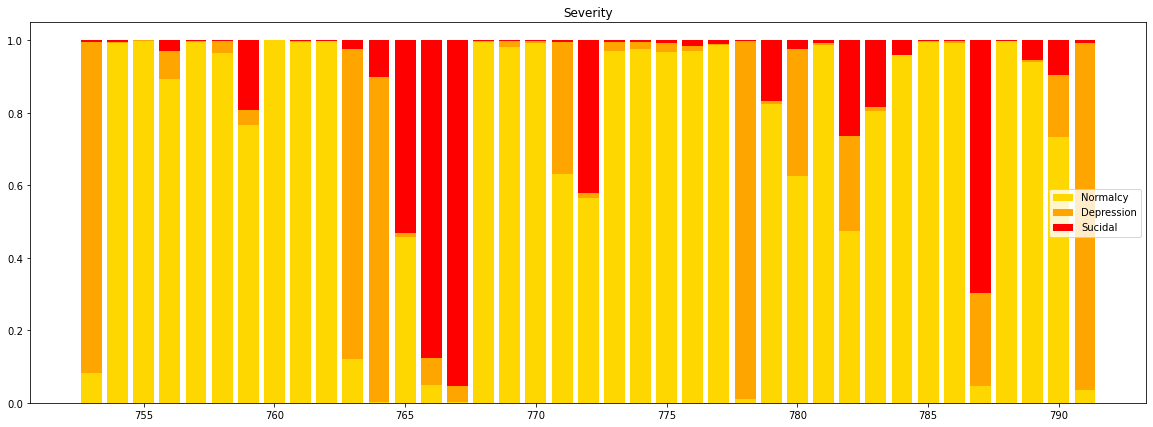

In [12]:
plt.figure(figsize=(20,7))
plt.bar(df_concern.index,df_concern['pred_lr_0_prob'], label = 'Normalcy',color='gold')
plt.bar(df_concern.index,df_concern['pred_lr_1_prob'],bottom=df_concern['pred_lr_0_prob'], label = 'Depression', color='orange')
plt.bar(df_concern.index,df_concern['pred_lr_2_prob'],bottom=df_concern['pred_lr_0_prob']+df_concern['pred_lr_1_prob'], label='Sucidal',color='r')
plt.title('Severity')
plt.legend()
plt.show()

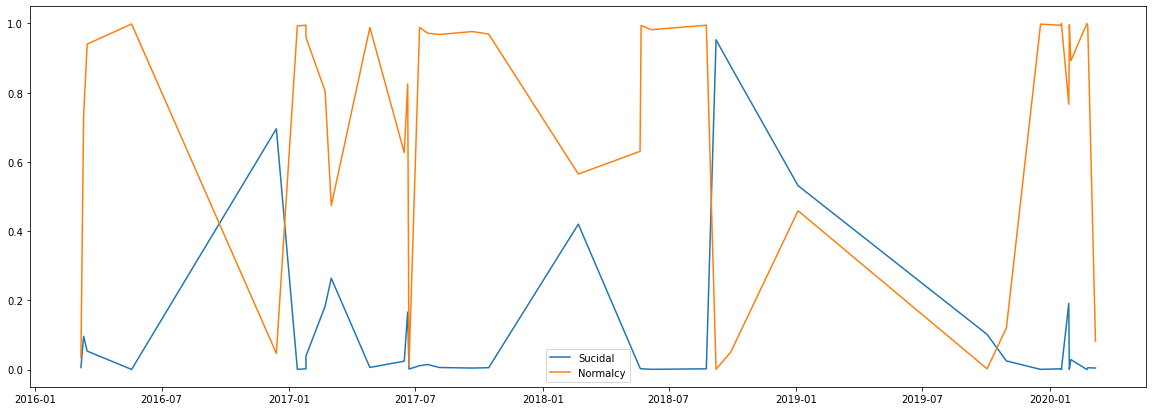

In [13]:
plt.figure(figsize=(20,7))
plt.plot(df_concern['created_utc3'],df_concern['pred_lr_2_prob'], label='Sucidal')
plt.plot(df_concern['created_utc3'],df_concern['pred_lr_0_prob'], label = 'Normalcy')
plt.legend()
plt.show()

# Prior to Flag 2, Flag 3: Remove users with only normal posts

In [14]:
Depressed=df_phase2_test.copy()
Depressed_time=df_phase2_test_time.copy()
Depressed

,author,author_fullname,created_utc,full_link,id,is_crosspostable,is_original_content,is_self,is_video,locked,...,pred_nb_class,pred_nb_0_prob,pred_nb_1_prob,pred_nb_2_prob,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,created_utc2,created_utc3
0,TFDP117,t2_ykz2e5o,1583521359,https://www.reddit.com/r/SuicideWatch/comments...,feiax9,False,False,True,False,False,...,1.0,0.236134,0.558678,0.205189,0.0,0.753947,0.241696,0.004357,2020-03-07,2020-03-07 03:02:39
1,TFDP117,t2_ykz2e5o,1577043774,https://www.reddit.com/r/PewdiepieSubmissions/...,ee998s,True,False,False,False,False,...,0.0,0.559459,0.225565,0.214976,0.0,0.999599,0.000254,0.000147,2019-12-23,2019-12-23 03:42:54
2,TFDP117,t2_ykz2e5o,1576829694,https://www.reddit.com/r/cursedimages/comments...,ed7aom,False,False,False,False,False,...,2.0,0.165613,0.213444,0.620943,0.0,0.991338,0.001019,0.007643,2019-12-20,2019-12-20 16:14:54
3,TFDP117,t2_ykz2e5o,1576815946,https://www.reddit.com/r/cursedimages/comments...,ed50b0,True,False,False,False,False,...,2.0,0.165613,0.213444,0.620943,0.0,0.985298,0.003347,0.011355,2019-12-20,2019-12-20 12:25:46
4,TFDP117,t2_ykz2e5o,1576782326,https://www.reddit.com/r/PewdiepieSubmissions/...,ecxq76,True,False,False,False,False,...,0.0,0.413461,0.294293,0.292246,0.0,0.994136,0.005013,0.000850,2019-12-20,2019-12-20 03:05:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,IBringDepression,NaN,1521119740,https://www.reddit.com/r/offmychest/comments/8...,84md3q,True,NaN,True,False,False,...,0.0,0.420662,0.297779,0.281559,0.0,0.952504,0.029630,0.017866,2018-03-15,2018-03-15 21:15:40
9966,IBringDepression,NaN,1520502645,https://www.reddit.com/r/depression/comments/8...,82wd3z,True,NaN,True,False,False,...,0.0,0.421900,0.291445,0.286655,0.0,0.996624,0.001259,0.002117,2018-03-08,2018-03-08 17:50:45
9967,IBringDepression,NaN,1520347348,https://www.reddit.com/r/depression/comments/8...,82fjjh,True,NaN,True,False,False,...,0.0,0.453447,0.335295,0.211257,0.0,0.995243,0.003399,0.001357,2018-03-06,2018-03-06 22:42:28
9968,IBringDepression,NaN,1520338059,https://www.reddit.com/r/depression/comments/8...,82ekjs,True,NaN,True,False,False,...,1.0,0.425835,0.455445,0.118720,0.0,0.887617,0.109753,0.002630,2018-03-06,2018-03-06 20:07:39


In [15]:
test=Depressed_time.groupby('author').max()
zerolist=test[test['pred_lr_class']==0].index.tolist()

In [16]:
DepressedOnly=Depressed[~Depressed['author'].isin(zerolist)].copy()
DepressedOnly_time=Depressed_time[~Depressed_time['author'].isin(zerolist)].copy()
DepressedOnly

,author,author_fullname,created_utc,full_link,id,is_crosspostable,is_original_content,is_self,is_video,locked,...,pred_nb_class,pred_nb_0_prob,pred_nb_1_prob,pred_nb_2_prob,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,created_utc2,created_utc3
14,AdrianaAura-,t2_5to3ryqi,1585534943,https://www.reddit.com/r/ShrineOfAntiVaxMom/co...,frigrc,True,False,True,False,False,...,2.0,0.316833,0.275265,0.407902,0.0,0.997696,4.819552e-04,1.822540e-03,2020-03-30,2020-03-30 10:22:23
15,AdrianaAura-,t2_5to3ryqi,1585366817,https://www.reddit.com/r/depression/comments/f...,fqcm24,True,False,True,False,False,...,1.0,0.096582,0.743517,0.159901,1.0,0.008102,9.888369e-01,3.060954e-03,2020-03-28,2020-03-28 11:40:17
16,AdrianaAura-,t2_5to3ryqi,1585315241,https://www.reddit.com/r/ShrineOfAntiVaxMom/co...,fpwt9l,True,False,True,False,False,...,2.0,0.314303,0.307753,0.377944,0.0,0.996283,1.761636e-03,1.954911e-03,2020-03-27,2020-03-27 21:20:41
17,AdrianaAura-,t2_5to3ryqi,1585284475,https://www.reddit.com/r/ShrineOfAntiVaxMom/co...,fpqvqf,True,False,False,True,False,...,1.0,0.287334,0.428244,0.284421,0.0,0.979152,1.810179e-02,2.746533e-03,2020-03-27,2020-03-27 12:47:55
18,AdrianaAura-,t2_5to3ryqi,1585019157,https://www.reddit.com/r/copypasta/comments/fn...,fnxr5m,True,False,True,False,False,...,0.0,0.662554,0.187546,0.149899,0.0,1.000000,1.837359e-13,1.569138e-07,2020-03-24,2020-03-24 11:05:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,IBringDepression,NaN,1521119740,https://www.reddit.com/r/offmychest/comments/8...,84md3q,True,NaN,True,False,False,...,0.0,0.420662,0.297779,0.281559,0.0,0.952504,2.963016e-02,1.786580e-02,2018-03-15,2018-03-15 21:15:40
9966,IBringDepression,NaN,1520502645,https://www.reddit.com/r/depression/comments/8...,82wd3z,True,NaN,True,False,False,...,0.0,0.421900,0.291445,0.286655,0.0,0.996624,1.259182e-03,2.116706e-03,2018-03-08,2018-03-08 17:50:45
9967,IBringDepression,NaN,1520347348,https://www.reddit.com/r/depression/comments/8...,82fjjh,True,NaN,True,False,False,...,0.0,0.453447,0.335295,0.211257,0.0,0.995243,3.399346e-03,1.357355e-03,2018-03-06,2018-03-06 22:42:28
9968,IBringDepression,NaN,1520338059,https://www.reddit.com/r/depression/comments/8...,82ekjs,True,NaN,True,False,False,...,1.0,0.425835,0.455445,0.118720,0.0,0.887617,1.097533e-01,2.629624e-03,2018-03-06,2018-03-06 20:07:39


C:\Users\vvack\miniconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


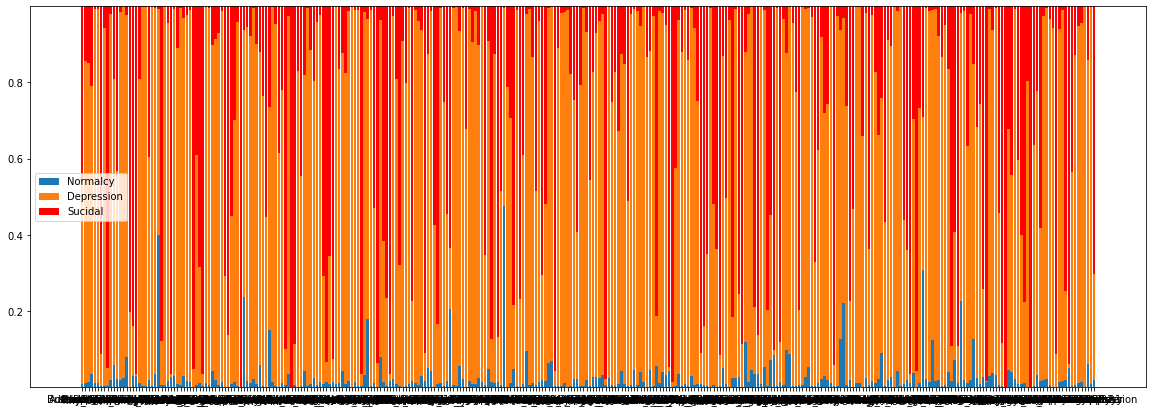

In [17]:
plt.figure(figsize=(20,7))
plt.bar(DepressedOnly['author'],DepressedOnly['pred_lr_0_prob'], label = 'Normalcy')
plt.bar(DepressedOnly['author'],DepressedOnly['pred_lr_1_prob'],bottom=DepressedOnly['pred_lr_0_prob'], label = 'Depression')
plt.bar(DepressedOnly['author'],DepressedOnly['pred_lr_2_prob'],bottom=DepressedOnly['pred_lr_0_prob']+DepressedOnly['pred_lr_1_prob'], label='Sucidal',color='r')
plt.legend()
plt.show()

In [18]:
DepressedOnly_time['dailyLRmax'] = DepressedOnly_time.groupby(['author','created_utc2'])['pred_lr_class'].transform('max')

In [19]:
DepressedOnly_time_summary=pd.DataFrame(DepressedOnly_time[DepressedOnly_time['dailyLRmax']==DepressedOnly_time['pred_lr_class']].groupby(['author','created_utc2']).mean()).reset_index(level=['author', 'created_utc2'])
DepressedOnly_time_summary

,author,created_utc2,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,dailyLRmax
0,-No_-,2020-01-06,1.0,0.172321,0.822324,0.005355,1.0
1,-No_-,2020-01-10,1.0,0.222267,0.707276,0.070457,1.0
2,-No_-,2020-01-13,0.0,0.993551,0.005050,0.001399,0.0
3,-No_-,2020-01-21,0.0,0.981062,0.004659,0.014279,0.0
4,-No_-,2020-01-23,1.0,0.112036,0.557227,0.330737,1.0
...,...,...,...,...,...,...,...
6803,xxfinadabsqad,2020-01-21,0.0,0.998791,0.000144,0.001065,0.0
6804,xxfinadabsqad,2020-03-24,0.0,0.983809,0.004425,0.011766,0.0
6805,xxfinadabsqad,2020-03-30,1.0,0.019806,0.978076,0.002117,1.0
6806,yumyumurmumscum,2020-03-22,1.0,0.027541,0.965949,0.006511,1.0


In [20]:
DepressedOnly_time_summary['author'].value_counts()

tw1706               95
realmuterol          93
Bad_cookie           89
Acid_Enthusiast      86
TheFearlessFrog      85
                     ..
momo05110             1
unfortunate-times     1
athingcalledpax       1
ar666de               1
BlissMill             1
Name: author, Length: 320, dtype: int64

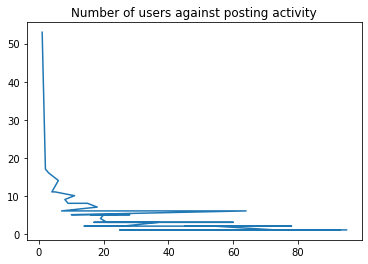

In [21]:
plt.plot((DepressedOnly_time_summary['author'].value_counts()).value_counts())
plt.title('Number of users against posting activity')
plt.show()

# Flag 2: Users with potential suicidal intent

In [22]:
typecheck=DepressedOnly_time_summary['author'].value_counts()<5
typecondition=typecheck[typecheck==True].index.tolist()

In [23]:
Typecheckonly=DepressedOnly_time_summary[DepressedOnly_time_summary['author'].isin(typecondition)]
Typecheckonly

,author,created_utc2,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,dailyLRmax
333,An873,2020-03-04,1.0,0.002607,0.995509,0.001884,1.0
552,BetterClaraTea,2020-03-29,1.0,0.062912,0.933469,0.003619,1.0
553,BlackHippie8,2020-03-17,1.0,0.009533,0.984569,0.005898,1.0
554,BlissMill,2020-03-17,1.0,0.013526,0.986327,0.000147,1.0
793,CoffeeAndWeed99,2020-02-13,0.0,0.981440,0.016719,0.001841,0.0
...,...,...,...,...,...,...,...
6728,whatsupBRUTHUH,2020-03-06,1.0,0.002188,0.994100,0.003712,1.0
6729,world-despoiling-ape,2020-03-25,1.0,0.010366,0.986459,0.003175,1.0
6730,xKemx,2020-03-27,1.0,0.010844,0.989093,0.000063,1.0
6806,yumyumurmumscum,2020-03-22,1.0,0.027541,0.965949,0.006511,1.0


In [24]:
Type_Summary=Typecheckonly.groupby('author').max()
Type_Summary

,created_utc2,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,dailyLRmax
author,,,,,,
An873,2020-03-04,1.0,0.002607,0.995509,0.001884,1.0
BetterClaraTea,2020-03-29,1.0,0.062912,0.933469,0.003619,1.0
BlackHippie8,2020-03-17,1.0,0.009533,0.984569,0.005898,1.0
BlissMill,2020-03-17,1.0,0.013526,0.986327,0.000147,1.0
CoffeeAndWeed99,2020-03-20,1.0,0.981440,0.986173,0.190081,1.0
...,...,...,...,...,...,...
whatsupBRUTHUH,2020-03-06,1.0,0.994861,0.994100,0.003712,1.0
world-despoiling-ape,2020-03-25,1.0,0.010366,0.986459,0.003175,1.0
xKemx,2020-03-27,1.0,0.010844,0.989093,0.000063,1.0


In [25]:
Type_Summary_flag=Type_Summary[Type_Summary['pred_lr_2_prob']>=0.3].index.tolist()
Type_Summary_flag

['Insidedimension1', 'kchismark']

# Flag 2: Example of algorithm

In [26]:
df_concern3_time=DepressedOnly[(DepressedOnly['author']=='kchismark')].copy()
df_concern3_time[['created_utc2','title','selftext','pred_lr_class','pred_lr_2_prob']]

,created_utc2,title,selftext,pred_lr_class,pred_lr_2_prob
4095,2020-03-29,One of those nights,I’ve drafted at least 100 suicide notes in my ...,2.0,0.958968
4096,2020-03-29,Finally some peace,"I just paid my rent for the last time, and bou...",0.0,0.337124
4097,2020-03-25,I don’t want help,I don’t want anyone’s help. I’ve tried and tri...,1.0,0.015903
4098,2020-03-13,Not sure if this has been posted yet but...,NaN,0.0,0.000909
4099,2020-01-13,Only you can save me,Its been two months since my last attempt and ...,1.0,0.375765


In [27]:
df_concern3=DepressedOnly_time_summary[DepressedOnly_time_summary['author']=='kchismark'].copy()
df_concern3

,author,created_utc2,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,dailyLRmax
4937,kchismark,2020-01-13,1.0,0.240947,0.383287,0.375765,1.0
4938,kchismark,2020-03-13,0.0,0.990259,0.008831,0.000909,0.0
4939,kchismark,2020-03-25,1.0,0.002501,0.981596,0.015903,1.0
4940,kchismark,2020-03-29,2.0,0.006393,0.034639,0.958968,2.0


In [28]:
df_concern3.mean()

<ipython-input-28-c076fd14837e>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_concern3.mean()


pred_lr_class     1.000000
pred_lr_0_prob    0.310025
pred_lr_1_prob    0.352088
pred_lr_2_prob    0.337887
dailyLRmax        1.000000
dtype: float64

In [29]:
first_day=df_concern3['created_utc2'].min()
last_day=df_concern3['created_utc2'].max()
#first_day=pd.Timestamp('20200113')
#last_day=pd.Timestamp('20200113')

In [30]:
df_concern3['days_since_start']=df_concern3['created_utc2'].apply(lambda x: (x-first_day).days)
df_concern3['days_since_end']=df_concern3['created_utc2'].apply(lambda x: (x-last_day).days)
df_concern3

,author,created_utc2,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,dailyLRmax,days_since_start,days_since_end
4937,kchismark,2020-01-13,1.0,0.240947,0.383287,0.375765,1.0,0,-76
4938,kchismark,2020-03-13,0.0,0.990259,0.008831,0.000909,0.0,60,-16
4939,kchismark,2020-03-25,1.0,0.002501,0.981596,0.015903,1.0,72,-4
4940,kchismark,2020-03-29,2.0,0.006393,0.034639,0.958968,2.0,76,0


In [31]:
#can toggle off check
df_concern3=df_concern3[df_concern3['days_since_end']>=-90]
df_concern3

,author,created_utc2,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,dailyLRmax,days_since_start,days_since_end
4937,kchismark,2020-01-13,1.0,0.240947,0.383287,0.375765,1.0,0,-76
4938,kchismark,2020-03-13,0.0,0.990259,0.008831,0.000909,0.0,60,-16
4939,kchismark,2020-03-25,1.0,0.002501,0.981596,0.015903,1.0,72,-4
4940,kchismark,2020-03-29,2.0,0.006393,0.034639,0.958968,2.0,76,0


In [32]:
df_concern3['pred_lr_2_prob'].max()>=0.3

True

In [33]:
X = np.asarray(df_concern3['days_since_start']).reshape(-1,1)
X.shape

(4, 1)

In [34]:
X1 = np.asarray(df_concern3['days_since_start']).reshape(-1,1)
y1 = np.asarray(df_concern3['pred_lr_2_prob']).reshape(-1,1)
y2 = np.asarray(df_concern3['pred_lr_0_prob']).reshape(-1,1)
gradient= LinearRegression().fit(X1,y2).coef_[0]
print('Gradient of class 0 (or normal) probability:', gradient.item())


Gradient of class 0 (or normal) probability: -0.0011762157608456612


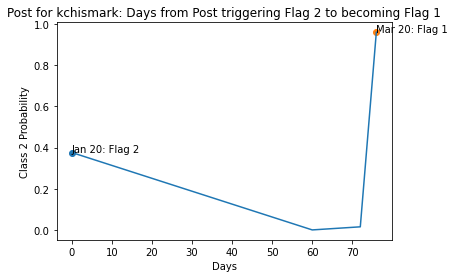

In [35]:
plt.title('Post for kchismark: Days from Post triggering Flag 2 to becoming Flag 1')
plt.scatter(X1[0],y1[0])
plt.plot(X1,y1)
plt.scatter(X1[3],y1[3])
plt.annotate('Jan 20: Flag 2',(X1[0],y1[0]))
plt.annotate('Mar 20: Flag 1',(X1[3],y1[3]))
plt.ylabel('Class 2 Probability')
plt.xlabel('Days')
plt.show()

The above highlights how early flagging under Flag 2 can catch users before they move on to more severe states

# Flag 3: Users with high levels of depression

In [36]:
trendcheck=DepressedOnly_time_summary['author'].value_counts()>=5
trendcondition=trendcheck[trendcheck==True].index.tolist()

In [37]:
Depressed_trending=DepressedOnly_time_summary[DepressedOnly_time_summary['author'].isin(trendcondition)]

In [38]:
df_concern2_time=DepressedOnly[(DepressedOnly['author']=='DespacitoCheeto')].copy()
df_concern2_time[['created_utc2','title','selftext','pred_lr_class','pred_lr_2_prob']]

,created_utc2,title,selftext,pred_lr_class,pred_lr_2_prob
401,2020-03-19,Please tell me how to end it,I don't want to do this. I just want to be dea...,1.0,0.027418
402,2020-03-18,Will cane toads actually eat dog food?,I got a pet cane toad a few days back. I've be...,0.0,0.006770
403,2020-03-18,Just found a crab spider bro,"I went herping out of sheer boredom, hoping to...",0.0,0.001466
404,2020-03-18,If you want to chat or something I'm free. Qua...,DM me or something. I'm open to battle people ...,0.0,0.000294
405,2020-03-18,I'm 16. What can I do to earn money during qua...,"I'm so bored, and I wanna earn $200 so I can b...",0.0,0.007789
...,...,...,...,...,...
496,2020-01-19,Weight loss or muscle gain?,"I'm 5' 8"" male, and am 175 pounds. I have a mo...",0.0,0.010482
497,2020-01-19,Skinny or Muscular with a Gut?,[removed],0.0,0.002190
498,2020-01-15,"Guys, I just realized something....",....we're milhouse from the simpsons!\n\n........,0.0,0.001847
499,2020-01-13,My new little Pacman frog from an expo! It blu...,NaN,0.0,0.003660


# Trending example

In [39]:
df_concern2=DepressedOnly_time_summary[DepressedOnly_time_summary['author']=='DespacitoCheeto'].copy()
df_concern2

,author,created_utc2,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,dailyLRmax
935,DespacitoCheeto,2020-01-11,0.0,0.999052,0.000598,0.000350,0.0
936,DespacitoCheeto,2020-01-13,0.0,0.996092,0.000247,0.003660,0.0
937,DespacitoCheeto,2020-01-15,0.0,0.997177,0.000976,0.001847,0.0
938,DespacitoCheeto,2020-01-19,0.0,0.994072,0.001655,0.004273,0.0
939,DespacitoCheeto,2020-01-22,1.0,0.220072,0.748914,0.031014,1.0
940,DespacitoCheeto,2020-01-23,0.0,0.997281,0.001600,0.001120,0.0
941,DespacitoCheeto,2020-01-24,0.0,0.992303,0.005848,0.001849,0.0
942,DespacitoCheeto,2020-01-25,0.0,0.837112,0.108120,0.054768,0.0
943,DespacitoCheeto,2020-01-28,0.0,0.993663,0.005164,0.001172,0.0
944,DespacitoCheeto,2020-01-29,2.0,0.138380,0.020445,0.841175,2.0


In [40]:
df_concern2.mean()

<ipython-input-40-5a3fd5dc72ef>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_concern2.mean()


pred_lr_class     0.255814
pred_lr_0_prob    0.798794
pred_lr_1_prob    0.131199
pred_lr_2_prob    0.070007
dailyLRmax        0.255814
dtype: float64

In [41]:
first_day=df_concern2['created_utc2'].min()
last_day=df_concern2['created_utc2'].max()
#first_day=pd.Timestamp('20200113')
#last_day=pd.Timestamp('20200113')

In [42]:
df_concern2['days_since_start']=df_concern2['created_utc2'].apply(lambda x: (x-first_day).days)
df_concern2['days_since_end']=df_concern2['created_utc2'].apply(lambda x: (x-last_day).days)
df_concern2

,author,created_utc2,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,dailyLRmax,days_since_start,days_since_end
935,DespacitoCheeto,2020-01-11,0.0,0.999052,0.000598,0.000350,0.0,0,-68
936,DespacitoCheeto,2020-01-13,0.0,0.996092,0.000247,0.003660,0.0,2,-66
937,DespacitoCheeto,2020-01-15,0.0,0.997177,0.000976,0.001847,0.0,4,-64
938,DespacitoCheeto,2020-01-19,0.0,0.994072,0.001655,0.004273,0.0,8,-60
939,DespacitoCheeto,2020-01-22,1.0,0.220072,0.748914,0.031014,1.0,11,-57
940,DespacitoCheeto,2020-01-23,0.0,0.997281,0.001600,0.001120,0.0,12,-56
941,DespacitoCheeto,2020-01-24,0.0,0.992303,0.005848,0.001849,0.0,13,-55
942,DespacitoCheeto,2020-01-25,0.0,0.837112,0.108120,0.054768,0.0,14,-54
943,DespacitoCheeto,2020-01-28,0.0,0.993663,0.005164,0.001172,0.0,17,-51
944,DespacitoCheeto,2020-01-29,2.0,0.138380,0.020445,0.841175,2.0,18,-50


In [43]:
#can toggle off check
df_concern22=df_concern2[df_concern2['days_since_end']>=-30]
df_concern22

,author,created_utc2,pred_lr_class,pred_lr_0_prob,pred_lr_1_prob,pred_lr_2_prob,dailyLRmax,days_since_start,days_since_end
958,DespacitoCheeto,2020-02-19,0.0,0.715304,0.049603,0.235093,0.0,39,-29
959,DespacitoCheeto,2020-02-20,0.0,0.731980,0.160199,0.107821,0.0,40,-28
960,DespacitoCheeto,2020-02-21,0.0,0.985747,0.007191,0.007061,0.0,41,-27
961,DespacitoCheeto,2020-02-22,0.0,0.990283,0.005930,0.003787,0.0,42,-26
962,DespacitoCheeto,2020-02-23,0.0,0.997804,0.001233,0.000964,0.0,43,-25
963,DespacitoCheeto,2020-02-24,0.0,0.997424,0.001557,0.001019,0.0,44,-24
964,DespacitoCheeto,2020-02-25,2.0,0.299278,0.309589,0.391133,2.0,45,-23
965,DespacitoCheeto,2020-02-26,0.0,0.976583,0.007424,0.015993,0.0,46,-22
966,DespacitoCheeto,2020-02-27,0.0,0.976700,0.014004,0.009296,0.0,47,-21
967,DespacitoCheeto,2020-02-28,0.0,0.984346,0.006375,0.009279,0.0,48,-20


In [44]:
df_concern22['pred_lr_2_prob'].max()>=0.3

True

In [45]:
X = np.asarray(df_concern22['days_since_start']).reshape(-1,1)
X.shape

(20, 1)

In [46]:
X31 = np.asarray(df_concern22['days_since_end']).reshape(-1,1)
y31 = np.asarray(df_concern22['pred_lr_2_prob']).reshape(-1,1)
y32 = np.asarray(df_concern22['pred_lr_0_prob']).reshape(-1,1)
gradient= LinearRegression().fit(X31,y32).coef_[0]
print('Gradient of class 0 (or normal) probability:', gradient.item())


Gradient of class 0 (or normal) probability: -0.012131266340140367


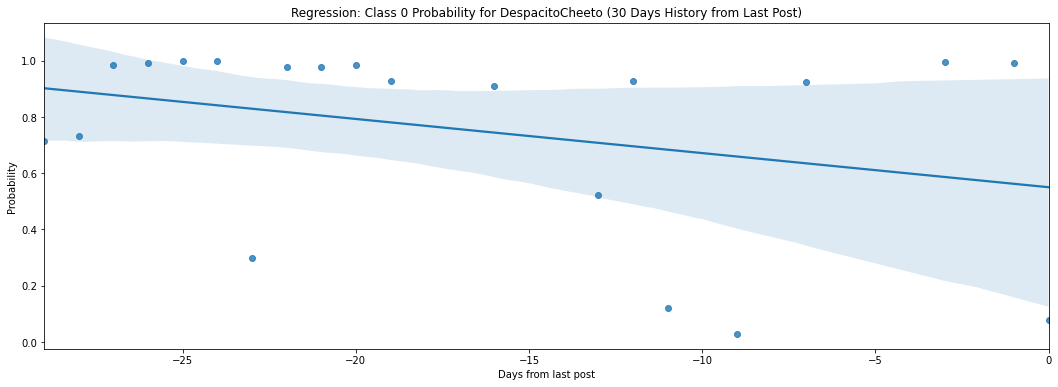

In [47]:
sns.regplot(x = X31, y = y32).figure.set_size_inches(18, 6)
plt.title('Regression: Class 0 Probability for DespacitoCheeto (30 Days History from Last Post)')
plt.ylabel('Probability')
plt.xlabel('Days from last post')
plt.show()

# Flag 3: Calculation
Here, we can toggle the lookback for the trending by adjusting the lookback value

In [48]:
trending=[]
lr_0_mean=[]
lr_2_max=[]
lookback=90
for item in trendcondition:
    df_concern4=Depressed_trending[(Depressed_trending['author']==item)].copy()
    first_day=df_concern4['created_utc2'].min()
    last_day=df_concern4['created_utc2'].max()
    df_concern4['days_since_start']=df_concern4['created_utc2'].apply(lambda x: (x-first_day).days)
    df_concern4['days_since_end']=df_concern4['created_utc2'].apply(lambda x: (x-last_day).days)
    df_concern4=df_concern4[df_concern4['days_since_end']>=-1*lookback]
    
    X1 = np.asarray(df_concern4['days_since_start']).reshape(-1,1)
    y1 = np.asarray(df_concern4['pred_lr_2_prob']).reshape(-1,1)
    y2 = np.asarray(df_concern4['pred_lr_0_prob']).reshape(-1,1)
    trend= LinearRegression().fit(X1,y2).coef_[0]
    
    trending.append(trend.item())
    lr_2_max.append(df_concern4['pred_lr_2_prob'].max())
    lr_0_mean.append(df_concern4['pred_lr_0_prob'].mean())
    

In [49]:
trending_tests= pd.DataFrame({'author' : trendcondition,'trend' : trending,'lr2max' : lr_2_max, 'lrmean':lr_0_mean})

trending_tests

,author,trend,lr2max,lrmean
0,tw1706,-0.005609,0.064238,0.895420
1,realmuterol,-0.020128,0.004119,0.662754
2,Bad_cookie,-0.000034,0.007018,0.763533
3,Acid_Enthusiast,-0.006382,0.045586,0.730250
4,TheFearlessFrog,-0.004340,0.062995,0.727775
...,...,...,...,...
218,_Lil_Drip_,0.012670,0.049220,0.403735
219,ifiwerecain,-0.006492,0.002958,0.706117
220,The_Man_2006,0.147974,0.892104,0.395905
221,Hrkl,-0.013324,0.566873,0.351289


In [50]:
Final_flag3=trending_tests[(trending_tests['trend']<=0.1)&(trending_tests['lr2max']>=0.3)&(~trending_tests['author'].isin(alist_all))]
print('Flag 3 list based on past', lookback, 'days')
Final_flag3

Flag 3 list based on past 90 days


,author,trend,lr2max,lrmean
47,DebbieWinner,0.000822,0.419856,0.921945
64,harumi_aizawa,-0.008087,0.391650,0.885407
67,Fireglut,-0.000824,0.318295,0.902807
84,rainbowtrout97,0.000654,0.385342,0.471589
128,trihornedllama,-0.001746,0.300819,0.832267
